We talked the basics of SVM in the [previous blog](http://qingkaikong.blogspot.com/2016/12/machine-learning-7-support-vector.html), and now let's use a example to show you how to use it easily with [sklearn](http://scikit-learn.org/stable/).   



In [67]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
plt.style.use('seaborn-poster')
%matplotlib inline

## Load and visualize data 

Let's load the [IRIS](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) from sklearn. This dataset is a very famous dataset for pattern recognition that from Fisher's paper. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. The features are Sepal Length, Sepal Width, Petal Length and Petal Width. They are related with the physical propertises of the plant. Today we will use only 2 features for easy visualization purposes. 

In [185]:
# import the iris data
iris = datasets.load_iris()

# let's just use the first two features, so that we can 
# easily visualize them
X = iris.data[:, [0, 2]]
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names
# get the classes
n_class = len(set(y))
print('We have %d classes in the data'%(n_class))

We have 3 classes in the data


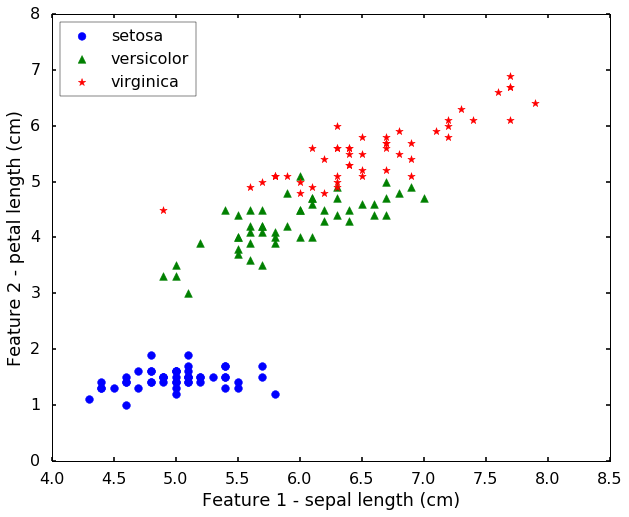

In [187]:
# let's have a look of the data first
plt.figure(figsize = (10,8))
for i, c, s in (zip(range(n_class), ['b', 'g', 'r'], ['o', '^', '*'])):
    ix = y == i
    plt.scatter(X[:, 0][ix], X[:, 1][ix], color = c, marker = s, s = 60, label = target_names[i])

plt.legend(loc = 2, scatterpoints = 1)
plt.xlabel('Feature 1 - ' + feature_names[0])
plt.ylabel('Feature 2 - ' + feature_names[2])
plt.show()

## Train an SVM classifier  

Since our purpose is to understand the SVM classifier, therefore, we won't split the data into training, validation, and test dataset. Also, we will not scale the data, because the values are all similar. (In reality, you still want this in your workflow, and use cross-validation or gridsearch to determine some parameters). Here, let's just train the SVM classifier directly. 

In [188]:
# Initialize ANN classifier
clf = svm.SVC(kernel='linear')

# Train the classifier with the traning data
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

I will explain the options usually you need change or know briefly here:  
* activation - this is to define different activation functions.   
* alpha - this parameter controls the [regularization][1] which help avoiding overfitting.  
* solver - the option to choose different algorithm for weight optimization. 
* batch_size - size of minibatches for stochastic optimizers. This is the option that will decide how much samples will be used in [online learning](https://en.wikipedia.org/wiki/Online_machine_learning).   
* learning_rate - option to use different learning rate for weight updates. You can use constant learning rate, or changing the learning rate with progress.   
* max_iter - maximum number of iterations. This will decide when to stop the solver, either the solver converges (determined by 'tol') or this maximum number of iterations.  
* tol - tolerance for the optimization.  
* momentum - momentum for gradient descent update. This will try to avoid trap the local minimum. 

[1]: https://en.wikipedia.org/wiki/Regularization_(mathematics)

## The training results

After we trained the SVM classifier, we will test the performance of the classifier using the test data. To evaluate the results, we will plot the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). 

In [189]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig = plt.figure(figsize=(10, 8)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

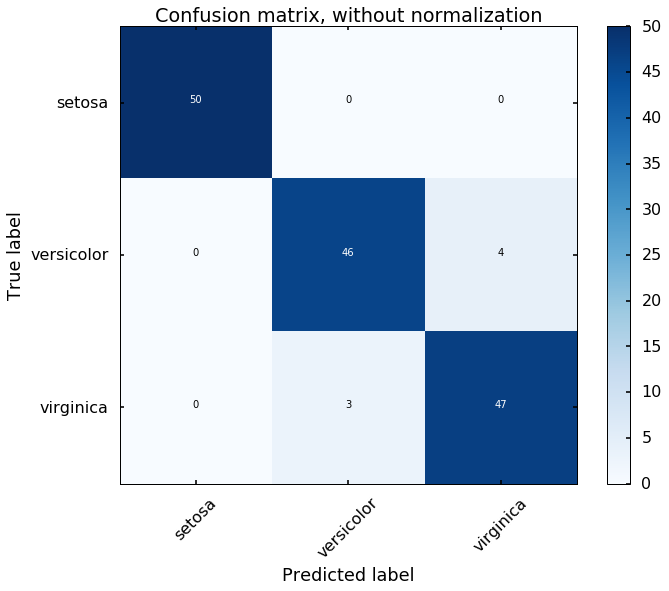

In [191]:
# predict results from the test data
predicted = clf.predict(X)

# plot the confusion matrix
cm = confusion_matrix(y,predicted)
plot_confusion_matrix(cm, classes=iris.target_names,
                      title='Confusion matrix, without normalization')

The x axis is the predicted digit from the MLP model, and the y axis is the true digit. The diagonal represents the correct results, we can see most of the digits we can estimate correctly. If we look at the first row, the off-diagonal number represents how many digits we estimate wrong for the digit 0, if there is 1 at the 6th column, this means that we classify one 0 digit to 5. 

In [195]:
# Plotting decision regions
def plot_desicion_boundary(X, y, clf):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize = (10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

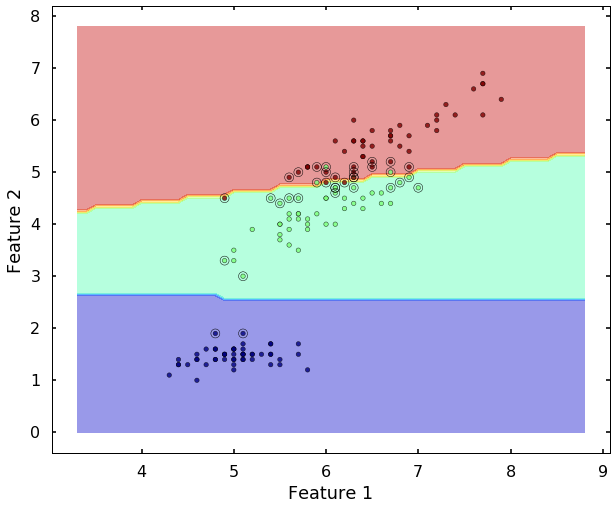

In [196]:
plot_desicion_boundary(X, y, clf)

## Let's see another example

In [197]:
# Construct dataset
X1, y1 = datasets.make_gaussian_quantiles(cov=2.,
                                 n_samples=400, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = datasets.make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=400, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

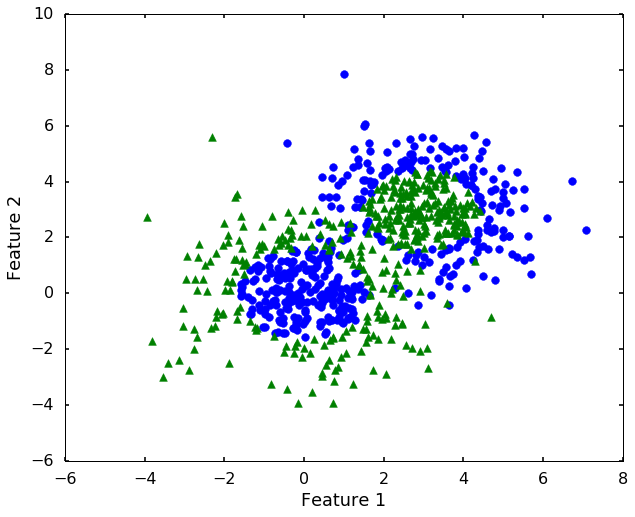

In [198]:
# let's have a look of the data first
plt.figure(figsize = (10,8))
for i, c, s in (zip(range(n_class), ['b', 'g', 'r'], ['o', '^', '*'])):
    ix = y == i
    plt.scatter(X[:, 0][ix], X[:, 1][ix], color = c, marker = s, s = 60)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [199]:
# Initialize ANN classifier
clf = svm.SVC(kernel='linear')

# Train the classifier with the traning data
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

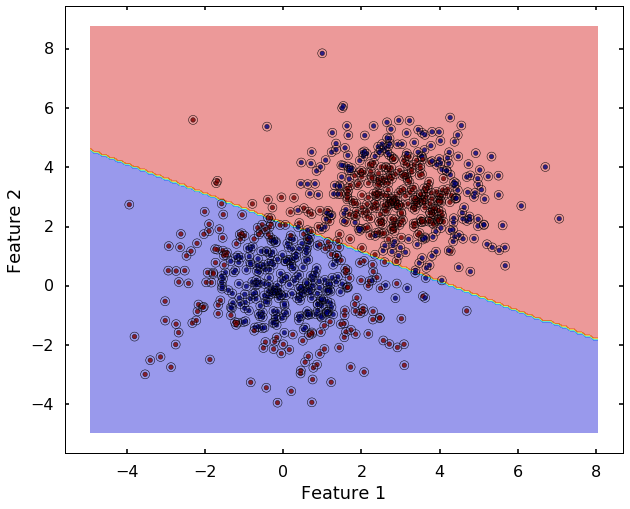

In [200]:
plot_desicion_boundary(X, y, clf)

In [201]:
# Initialize ANN classifier
clf = svm.SVC(kernel='rbf', C=1)

# Train the classifier with the traning data
clf.fit(X,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

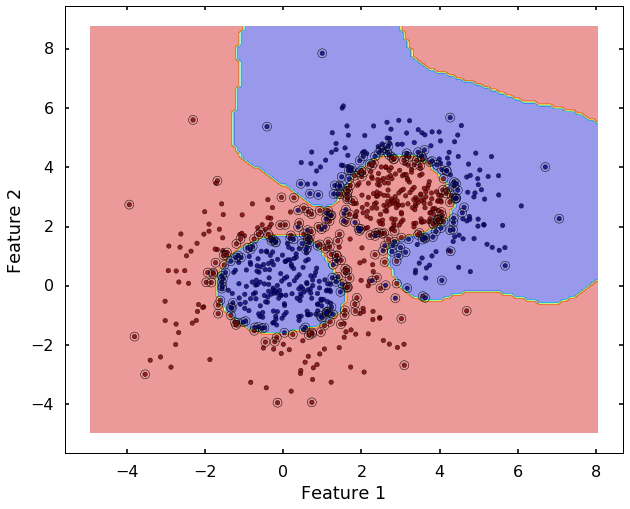

In [202]:
plot_desicion_boundary(X, y, clf)